# Gerekli Kütüphanelerin İçe Aktarılması
Pandas ve diğer gerekli kütüphanelerin içe aktarılması.

In [1]:
%pip install pandas numpy matplotlib seaborn calendar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
# Grafiklerin not defterinde görüntülenmesi için
%matplotlib inline

ERROR: Could not find a version that satisfies the requirement calendar (from versions: none)
ERROR: No matching distribution found for calendar


# Veri Kümesinin Yüklenmesi
retail_transactions_dataset veri kümesinin Pandas ile yüklenmesi.

In [2]:
# Veri Kümesinin Yüklenmesi
dataset_path = 'retail_transactions_dataset.csv'  # Veri kümesinin dosya yolu
df = pd.read_csv(dataset_path)  # Veri kümesini Pandas ile yükleme
# İlk birkaç satırı görüntüleme
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


# Veri Kümesi Hakkında Genel Bilgiler
Veri kümesinin genel bilgilerini görüntüleme (örneğin, ilk birkaç satır, veri türleri, özet istatistikler).

In [3]:
# Veri türlerini görüntüleme
df.dtypes

# Özet istatistikleri görüntüleme
df.describe()

# Veri kümesinin genel bilgilerini görüntüleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


# Eksik Verilerin Analizi
Veri kümesindeki eksik verilerin tespit edilmesi ve analizi.

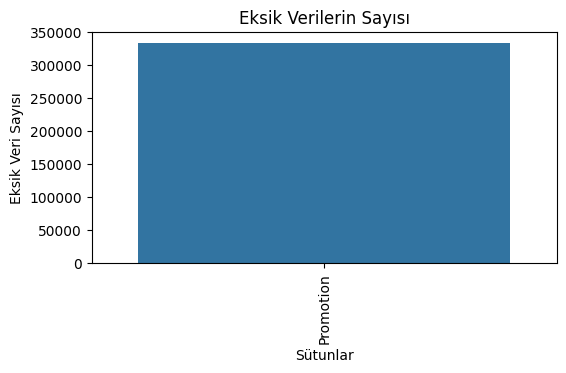

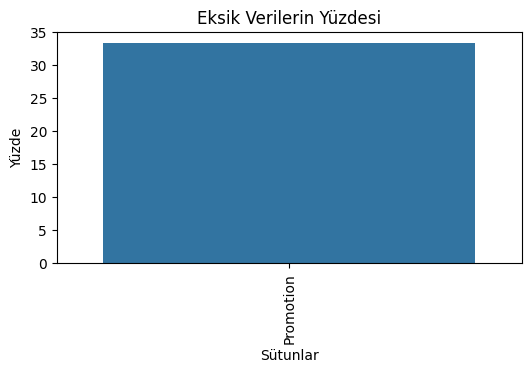

In [4]:
# Eksik Verilerin Analizi

# Eksik verilerin sayısını ve yüzdesini hesaplama
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Eksik verilerin sayısını ve yüzdesini bir DataFrame olarak görüntüleme
missing_data = pd.DataFrame({'Missing Values': missing_values_count, 'Percentage': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Sadece eksik verisi olan sütunları göster
missing_data.sort_values(by='Missing Values', ascending=False, inplace=True)

missing_data

# Eksik verilerin görselleştirilmesi
plt.figure(figsize=(6, 3))
sns.barplot(x=missing_data.index, y=missing_data['Missing Values'])
plt.xticks(rotation=90)
plt.title('Eksik Verilerin Sayısı')
plt.xlabel('Sütunlar')
plt.ylabel('Eksik Veri Sayısı')
plt.show()

# Eksik verilerin yüzdesinin görselleştirilmesi
plt.figure(figsize=(6, 3))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'])
plt.xticks(rotation=90)
plt.title('Eksik Verilerin Yüzdesi')
plt.xlabel('Sütunlar')
plt.ylabel('Yüzde')
plt.show()

# Veri Kümesinin Temizlenmesi
Eksik verilerin doldurulması veya çıkarılması, veri türlerinin düzeltilmesi gibi veri temizleme işlemleri.

In [5]:
# Eksik Verilerin Doldurulması veya Çıkarılması


# Kullanılmayacak sütunları kaldırma
df_cleaned = df.drop(columns=['Customer_Name'])
df_cleaned = df_cleaned.drop(columns=['Transaction_ID'])

# Eksik verilerin olduğu satırları çıkarma
df_cleaned = df_cleaned.dropna()
# Alternatif olarak, eksik verileri belirli bir değerle doldurma (örneğin, ortalama ile)
# df.fillna(df.mean(), inplace=True)

# Veri Türlerinin Düzeltilmesi

# Tarih sütununu datetime veri türüne dönüştürme
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

import ast
from itertools import chain


df_cleaned['Product'] = df_cleaned['Product'].apply(ast.literal_eval)


# Daha iyi analiz için ürünleri normalize et
df_cleaned['Normalized_Products'] = df_cleaned['Product'].apply(lambda x: list(chain.from_iterable([p.split(",") for p in x])))


# toothpaste ürününü veri setinden kaldırdım çünkü veri seti sentetik bir veriseti ve toothpaste ürünü anlamsız derecede fazla
df_cleaned['Normalized_Products'] = df_cleaned['Normalized_Products'].apply(lambda products: [product for product in products if product != 'Toothpaste'])


# Kategorik sütunları category veri türüne dönüştürme
#categorical_columns = ['Product', 'Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
#for col in categorical_columns:
 #   if col in df_cleaned.columns:
  #      df_cleaned[col] = df_cleaned[col].astype('category')  # Kategorik sütunların isimleri



# Temizlenmiş veri kümesinin genel bilgilerini görüntüleme
df_cleaned.info()

# Temizlenmiş veri kümesinin ilk birkaç satırını görüntüleme
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 666057 entries, 1 to 999999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 666057 non-null  datetime64[ns]
 1   Product              666057 non-null  object        
 2   Total_Items          666057 non-null  int64         
 3   Total_Cost           666057 non-null  float64       
 4   Payment_Method       666057 non-null  object        
 5   City                 666057 non-null  object        
 6   Store_Type           666057 non-null  object        
 7   Discount_Applied     666057 non-null  bool          
 8   Customer_Category    666057 non-null  object        
 9   Season               666057 non-null  object        
 10  Promotion            666057 non-null  object        
 11  Normalized_Products  666057 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 

,Date,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Normalized_Products
1,2023-03-01 13:01:21,"[Ice Cream, Milk, Olive Oil, Bread, Potatoes]",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),"[Ice Cream, Milk, Olive Oil, Bread, Potatoes]"
4,2020-12-10 00:59:59,[Dish Soap],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,[Dish Soap]
5,2021-10-07 12:37:26,"[Toothpaste, Chicken]",3,72.24,Cash,Houston,Supermarket,True,Retiree,Spring,Discount on Selected Items,[Chicken]
6,2023-01-08 10:40:03,"[Honey, BBQ Sauce, Soda, Olive Oil, Garden Hose]",4,5.28,Cash,Boston,Specialty Store,False,Student,Summer,Discount on Selected Items,"[Honey, BBQ Sauce, Soda, Olive Oil, Garden Hose]"
7,2020-09-03 12:39:59,"[Syrup, Trash Cans, Pancake Mix, Water, Mayonn...",5,21.77,Debit Card,Chicago,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,"[Syrup, Trash Cans, Pancake Mix, Water, Mayonn..."


# Temel İstatistiksel Analizler
Veri kümesi üzerinde temel istatistiksel analizlerin yapılması (örneğin, ortalama, medyan, standart sapma).

In [6]:
general_stats = {
    "Total_Transactions": df_cleaned.shape[0],
    "Unique_Products": len(set(chain.from_iterable(df_cleaned['Normalized_Products']))),
    "Payment_Methods": df_cleaned['Payment_Method'].value_counts().to_dict(),
    "Store_Types": df_cleaned['Store_Type'].value_counts().to_dict(),
    "Cities": df_cleaned['City'].value_counts().to_dict(),
    "Seasons": df_cleaned['Season'].value_counts().to_dict(),
}

general_stats

{'Total_Transactions': 666057,
 'Unique_Products': 80,
 'Payment_Methods': {'Cash': 166777,
  'Credit Card': 166614,
  'Mobile Payment': 166561,
  'Debit Card': 166105},
 'Store_Types': {'Supermarket': 111341,
  'Pharmacy': 111290,
  'Convenience Store': 111189,
  'Warehouse Club': 111171,
  'Department Store': 110634,
  'Specialty Store': 110432},
 'Cities': {'Boston': 66982,
  'Seattle': 66892,
  'Dallas': 66851,
  'Chicago': 66773,
  'Houston': 66689,
  'New York': 66596,
  'Los Angeles': 66475,
  'San Francisco': 66386,
  'Miami': 66363,
  'Atlanta': 66050},
 'Seasons': {'Spring': 166969,
  'Winter': 166637,
  'Fall': 166485,
  'Summer': 165966}}

# Veri Görselleştirme
Veri kümesinin görselleştirilmesi için grafikler ve çizimler oluşturma.

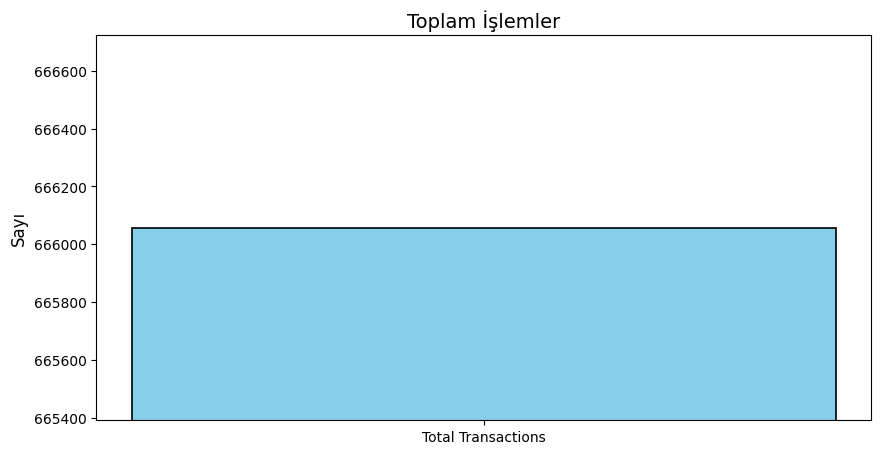

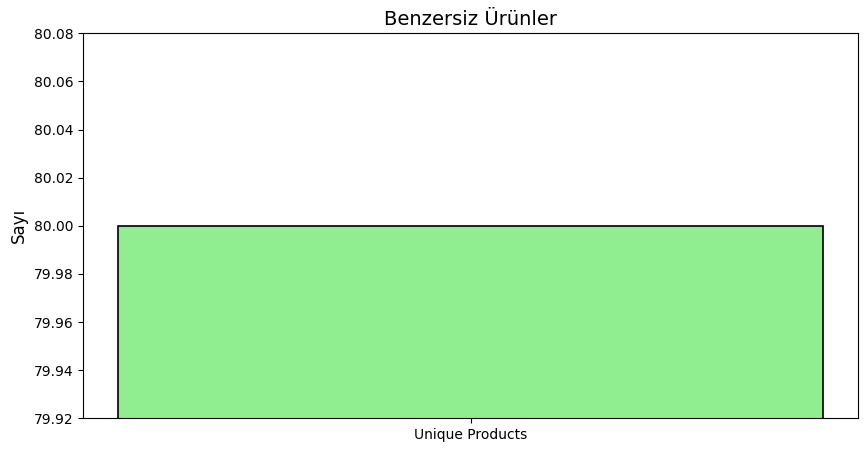

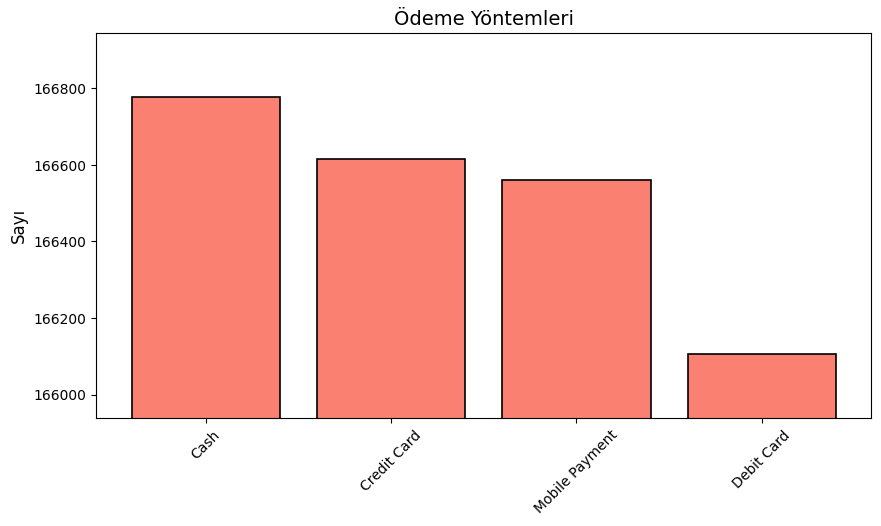

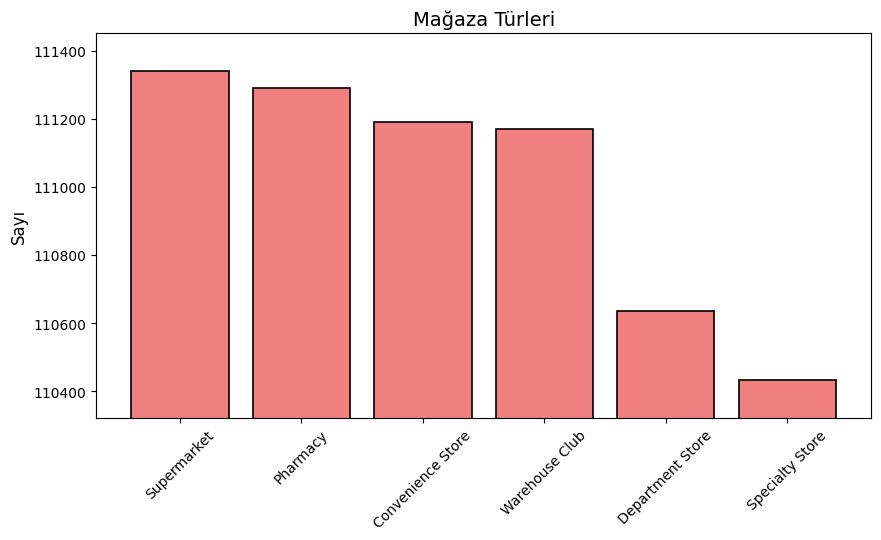

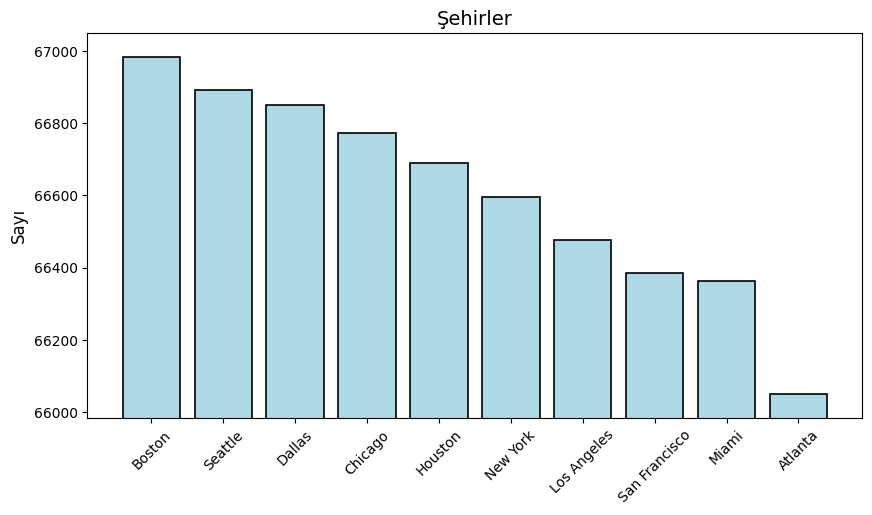

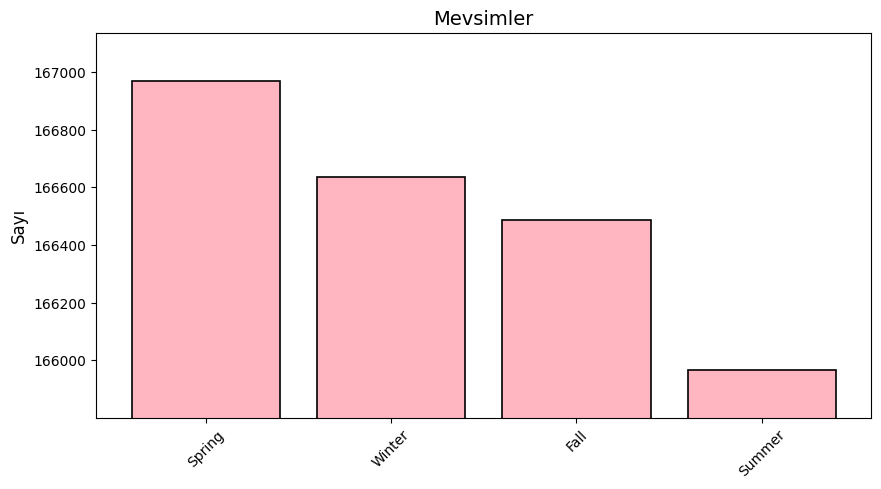

In [7]:
import matplotlib.pyplot as plt

# Toplam İşlemler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(['Total Transactions'], [general_stats['Total_Transactions']], color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Toplam İşlemler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.ylim(general_stats['Total_Transactions'] * 0.999, general_stats['Total_Transactions'] * 1.001)
plt.show()

# Benzersiz Ürünler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(['Unique Products'], [general_stats['Unique_Products']], color='lightgreen', edgecolor='black', linewidth=1.2)
plt.title('Benzersiz Ürünler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.ylim(general_stats['Unique_Products'] * 0.999, general_stats['Unique_Products'] * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Ödeme Yöntemleri Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Payment_Methods'].keys(), general_stats['Payment_Methods'].values(), color='salmon', edgecolor='black', linewidth=1.2)
plt.title('Ödeme Yöntemleri', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Payment_Methods'].values()) * 0.999, max(general_stats['Payment_Methods'].values()) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Mağaza Türleri Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Store_Types'].keys(), general_stats['Store_Types'].values(), color='lightcoral', edgecolor='black', linewidth=1.2)
plt.title('Mağaza Türleri', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Store_Types'].values()) * 0.999, max(general_stats['Store_Types'].values()) * 1.001)
plt.show()

# Şehirler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Cities'].keys(), general_stats['Cities'].values(), color='lightblue', edgecolor='black', linewidth=1.2)
plt.title('Şehirler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Cities'].values()) * 0.999, max(general_stats['Cities'].values()) * 1.001)
plt.show()

# Mevsimler Grafiği
plt.figure(figsize=(10, 5))
plt.bar(general_stats['Seasons'].keys(), general_stats['Seasons'].values(), color='lightpink', edgecolor='black', linewidth=1.2)
plt.title('Mevsimler', fontsize=14)
plt.ylabel('Sayı', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(general_stats['Seasons'].values()) * 0.999, max(general_stats['Seasons'].values()) * 1.001)
plt.show()

# Alınan Ürünler

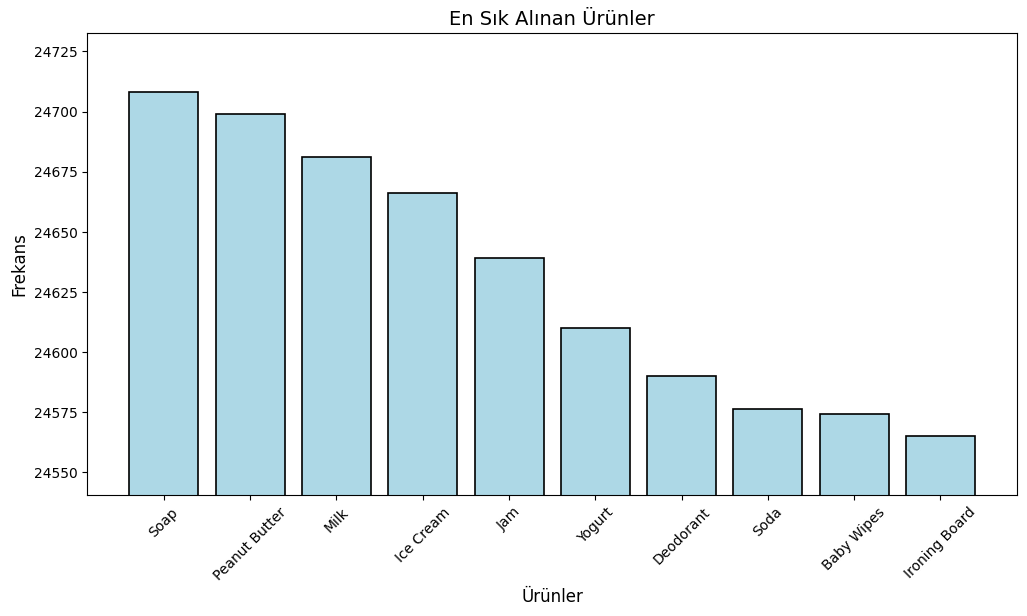

In [8]:
from collections import Counter
from itertools import chain

# Ürünlerin frekansını hesaplama
product_frequencies = Counter(chain.from_iterable(df_cleaned['Normalized_Products']))

# En sık alınan ilk 10 ürünü seçme
most_common_products = product_frequencies.most_common(10)
products, frequencies = zip(*most_common_products)

# Ürünlerin frekansını görselleştirme
plt.figure(figsize=(12, 6))
plt.bar(products, frequencies, color='lightblue', edgecolor='black', linewidth=1.2)
plt.title('En Sık Alınan Ürünler', fontsize=14)
plt.xlabel('Ürünler', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(min(frequencies) * 0.999, max(frequencies) * 1.001)  # Y ekseni aralığını daha da daraltma
plt.show()

# Müşteri Kategorisi Dağılımı


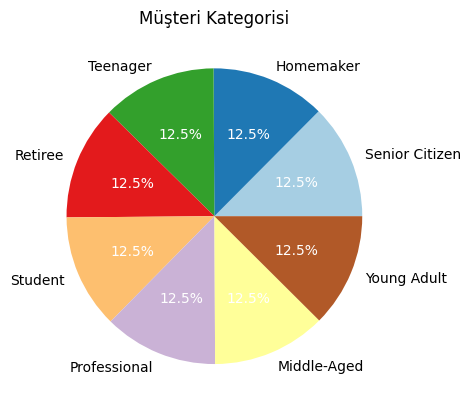

In [9]:
# Müşteri Kategorisi Dağılımı
val = df["Customer_Category"].value_counts()
wedges, texts, autotexts = plt.pie(val, labels=val.index, autopct="%1.1f%%")
colors = [plt.cm.Paired(i) for i in np.linspace(0, 1, len(wedges))]
for i in range(len(wedges)):
    wedges[i].set_facecolor(colors[i])
    autotexts[i].set_color('white')

plt.title('Müşteri Kategorisi')
plt.show()

# Mevsimlere göre en çok alınan ürünlerin görselleştirilmesi


C:\Users\admin\AppData\Local\Temp\ipykernel_10536\2487620479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winter.products, y=winter['count'], ax=axes[0][0], palette='Set1')
C:\Users\admin\AppData\Local\Temp\ipykernel_10536\2487620479.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fall.products, y=fall['count'], ax=axes[0][1], palette='hsv')
C:\Users\admin\AppData\Local\Temp\ipykernel_10536\2487620479.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summer.products, y=summer['count'], ax=axes[1][0], palette='Set2')
C:\U

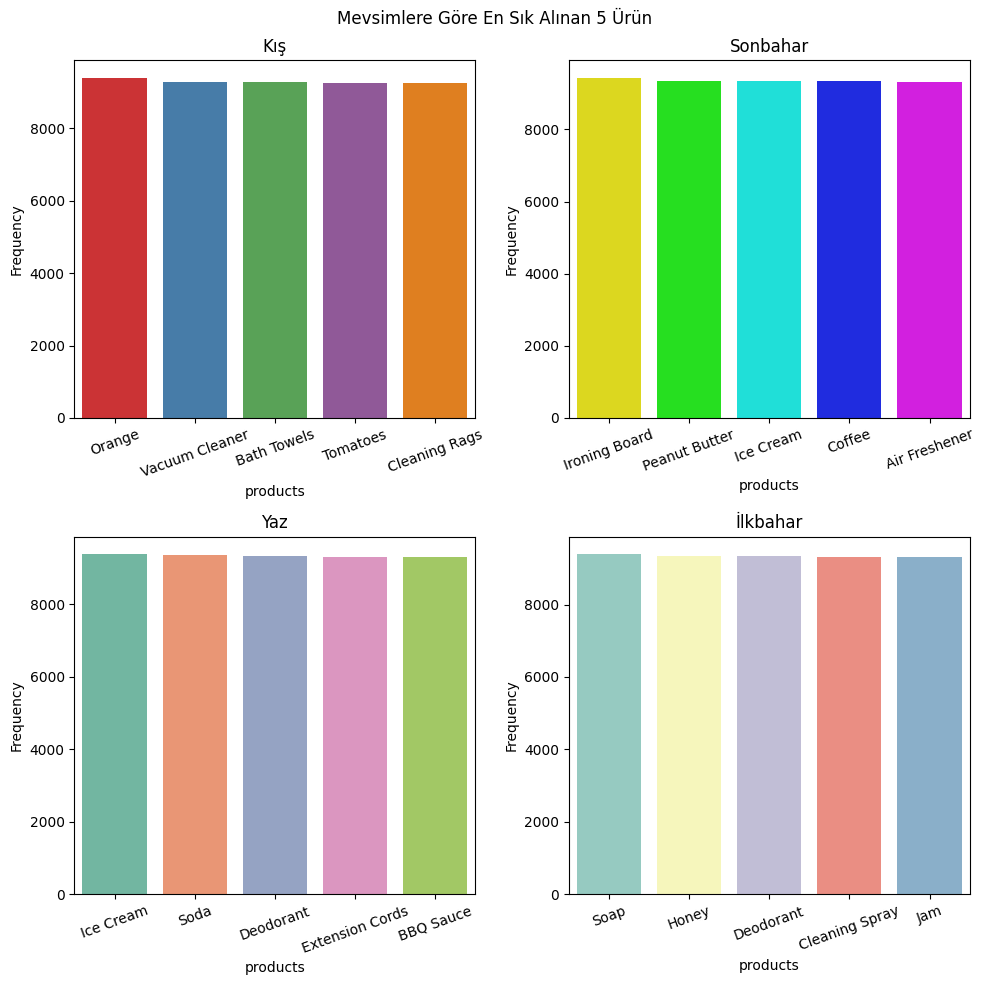

In [10]:
# Mevsimlere göre en çok alınan ürünlerin görselleştirilmesi
seasonal_products = df.groupby('Season')['Product'].apply(lambda x: list(chain.from_iterable(x.apply(ast.literal_eval)))).reset_index()
seasonal_products['count'] = seasonal_products['Product'].apply(lambda x: Counter([item for item in x if item != 'Toothpaste']).most_common(5))
winter = pd.DataFrame(seasonal_products[seasonal_products['Season'] == 'Winter']['count'].values[0], columns=['products', 'count'])
fall = pd.DataFrame(seasonal_products[seasonal_products['Season'] == 'Fall']['count'].values[0], columns=['products', 'count'])
summer = pd.DataFrame(seasonal_products[seasonal_products['Season'] == 'Summer']['count'].values[0], columns=['products', 'count'])
spring = pd.DataFrame(seasonal_products[seasonal_products['Season'] == 'Spring']['count'].values[0], columns=['products', 'count'])
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.barplot(x=winter.products, y=winter['count'], ax=axes[0][0], palette='Set1')
sns.barplot(x=fall.products, y=fall['count'], ax=axes[0][1], palette='hsv')
sns.barplot(x=summer.products, y=summer['count'], ax=axes[1][0], palette='Set2')
sns.barplot(x=spring.products, y=spring['count'], ax=axes[1][1], palette='Set3')
title = ["Kış", "Sonbahar", "Yaz", "İlkbahar"]
count = 0
for i in range(2):
    for j in range(2):
        axes[i][j].set_xticklabels(axes[i][j].get_xticklabels(), rotation=20)
        axes[i][j].set_title(title[count])
        axes[i][j].set_ylabel('Frequency')
        axes[i][j].set_ylim(axes[i][j].get_ylim()[0] * 0.999, axes[i][j].get_ylim()[1] * 1.001)
        count += 1
plt.suptitle('Mevsimlere Göre En Sık Alınan 5 Ürün')
plt.tight_layout()
plt.show()

# En sık beraber alınan ürünler


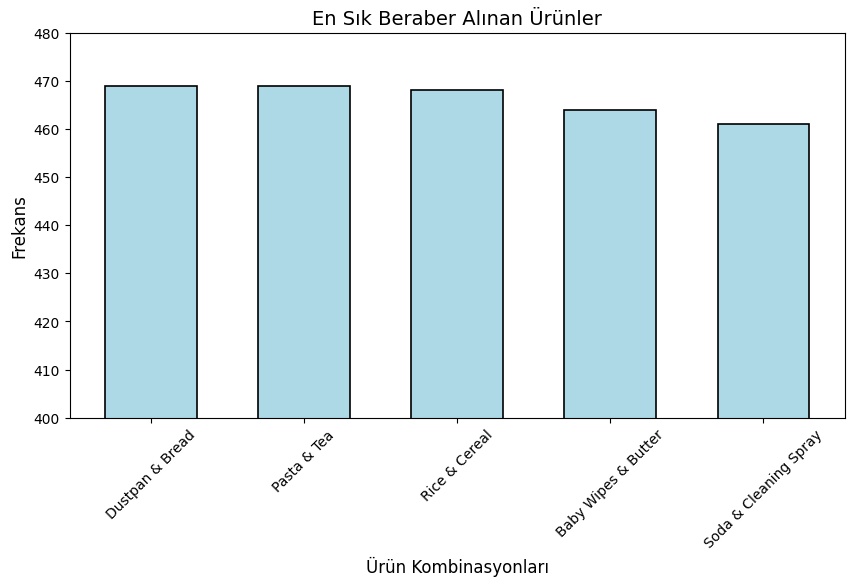

In [11]:
from itertools import combinations
from collections import Counter
# Ürün kombinasyonlarını hesaplama
product_combinations = []
for products in df_cleaned['Normalized_Products']:
    product_combinations.extend(combinations(products, 2))

# Kombinasyonların frekansını hesaplama
combination_frequencies = Counter(product_combinations)

# En sık beraber alınan ilk 5 ürün kombinasyonunu seçme
most_common_combinations = combination_frequencies.most_common(5)
combinations, frequencies = zip(*most_common_combinations)

# Kombinasyonları daha okunabilir hale getirme
combinations = [f"{combo[0]} & {combo[1]}" for combo in combinations]

# Kombinasyonların frekansını görselleştirme
plt.figure(figsize=(10, 5))
plt.bar(combinations, frequencies, color='lightblue', edgecolor='black', linewidth=1.2, width=0.6)
plt.title('En Sık Beraber Alınan Ürünler', fontsize=14)
plt.xlabel('Ürün Kombinasyonları', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylim(400, 480)  # Y eksenini daralt
plt.yticks(fontsize=10)
plt.show()

In [25]:
# Recency, Frequency ve Monetary değerlerinin hesaplanması
# Recency: Müşterinin son alışveriş yaptığı tarihten itibaren geçen gün sayısı
# Frequency: Müşterinin toplam alışveriş sayısı
# Monetary: Müşterinin toplam harcama miktarı
df['Date'] = pd.to_datetime(df['Date'])
latest_date = df['Date'].max()
rfm = df.groupby('Customer_Name').agg({
    'Date': lambda x: (latest_date - x.max()).days,
    'Transaction_ID': 'count',
    'Total_Cost': 'sum'
}).reset_index()
rfm.columns = ['Customer_Name', 'Recency', 'Frequency', 'Monetary']
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm.head(10)

,Customer_Name,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,Aaron Acevedo,249,4,279.85,4,5,5,455
1,Aaron Acosta,836,3,215.32,2,4,5,245
2,Aaron Adams,33,12,772.36,5,5,5,555
3,Aaron Adkins,393,3,118.52,3,4,4,344
4,Aaron Aguilar,56,5,236.76,5,5,5,555
5,Aaron Alexander,247,4,201.06,4,5,5,455
6,Aaron Allen,78,13,847.64,5,5,5,555
7,Aaron Allison,1506,1,81.02,1,1,3,113
8,Aaron Alvarado,400,1,13.86,3,1,1,311
9,Aaron Alvarez,269,3,187.48,4,4,5,445


C:\Users\admin\AppData\Local\Temp\ipykernel_10536\4146601962.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_percentage, palette='Set2')
C:\Users\admin\AppData\Local\Temp\ipykernel_10536\4146601962.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, segment_percentage[i], f'{segment_percentage[i]:.2f}%', ha='center', va='bottom')


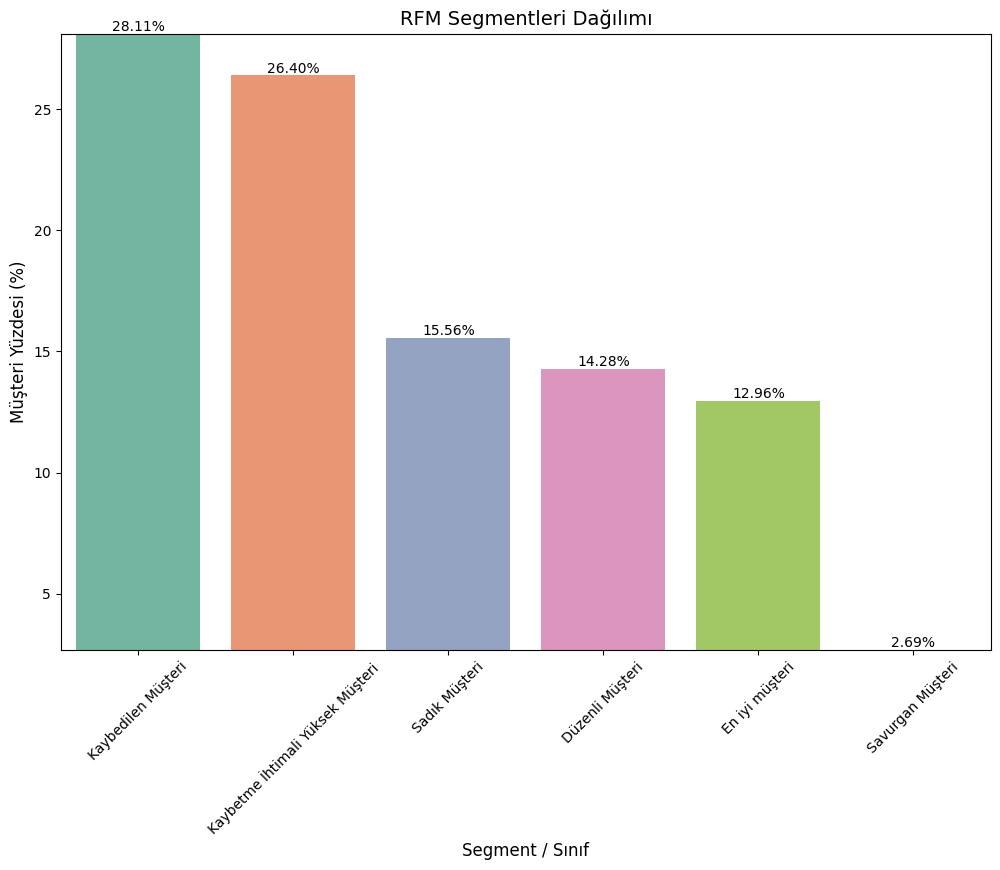

In [37]:
# RFM segmentlerini tanımlama
def segment_customer(df):
    if df['RFM_Score'] == '555':
        return 'En iyi müşteri'
    elif df['R_Score'] == 5:
        return 'Sadık Müşteri'
    elif df['F_Score'] == 5:
        return 'Düzenli Müşteri'
    elif df['M_Score'] == 5:
        return 'Savurgan Müşteri'
    elif df['R_Score'] == 2:
        return 'Kaybetme İhtimali Yüksek Müşteri'
    elif df['R_Score'] == 1:
        return 'Kaybedilen Müşteri'
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
segment_counts = rfm['Segment'].value_counts()
segment_counts
plt.figure(figsize=(12, 8))
segment_percentage = (segment_counts / segment_counts.sum()) * 100
sns.barplot(x=segment_counts.index, y=segment_percentage, palette='Set2')
plt.title('RFM Segmentleri Dağılımı', fontsize=14)
plt.xlabel('Segment / Sınıf', fontsize=12)
plt.ylabel('Müşteri Yüzdesi (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(segment_percentage.min() * 0.9999, segment_percentage.max() * 1.0001)
for i in range(len(segment_percentage)):
    plt.text(i, segment_percentage[i], f'{segment_percentage[i]:.2f}%', ha='center', va='bottom')
plt.show()